## Senanur Ağaç - 200102002043

## LAB05

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fft import fft
from scipy.fft import fftshift
from scipy.fft import ifft2

In [2]:
def mypgmread(filename):
    with open(filename, 'rb') as f:
        header = []
        # PGM dosyasının başlık bilgileri okundu
        while True:
            line = f.readline().decode('ascii').strip()
            if not line or line.startswith('#'):
                continue
            header.append(line)
            if len(header) == 3:
                break

        if len(header) < 3:
            print("Geçersiz PGM dosya formatı.")
            return None

        # Genişlik, yükseklik ve maksimum değer başlık bilgilerinden alındı
        width, height = map(int, header[1].split())
        maxval = int(header[2])

        # Veriyi okundu
        pixel_values = np.fromfile(f, dtype=np.uint8, count=width * height)

        # Veriyi boyutlarına uygun şekilde yeniden şekillendildi
        pixel_values = pixel_values.reshape((height, width))

        return pixel_values, width, height, maxval


## Fig1016

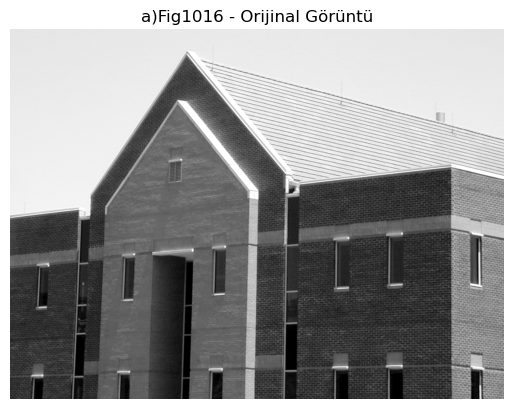

In [3]:
Fig1016, width, height, maxval = mypgmread('Fig1016.pgm')
plt.figure(dpi=100)
plt.imshow(Fig1016, cmap='gray')
plt.title('a)Fig1016 - Orijinal Görüntü')
plt.axis('off')
plt.show()

In [4]:
def sobel_gradient(imgval, width, height):
    mask_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    mask_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    size = 3
    pnum = 3 // 2

    padding = np.pad(imgval, pnum, mode='constant')  # padding yapılır
    gradient_x = np.zeros([height, width])
    gradient_y = np.zeros([height, width])

    for i in range(0, height - 1):
        for j in range(0, width - 1):
            data = padding[i:i + size, j:j + size]
            gradient_x[i][j] = int(np.sum((padding[i:i + size, j:j + size]) * mask_x))
            gradient_y[i][j] = int(np.sum((padding[i:i + size, j:j + size]) * mask_y))
    
    gradiend_xa= np.abs(gradient_x)
    gradiend_ya= np.abs(gradient_y)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    return gradiend_xa, gradiend_ya, gradient_magnitude

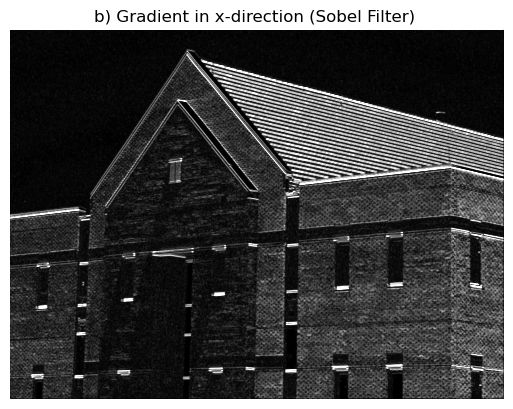

In [5]:
Fig1016, width, height, maxval = mypgmread('Fig1016.pgm')
gradiendx, gradiendy, sobel_gradient_result = sobel_gradient(Fig1016, width, height)
plt.figure(dpi=100)
plt.imshow(gradiendx, cmap='gray',vmax=255, vmin=0)
plt.axis('off')
plt.title('b) Gradient in x-direction (Sobel Filter) ')
plt.show()

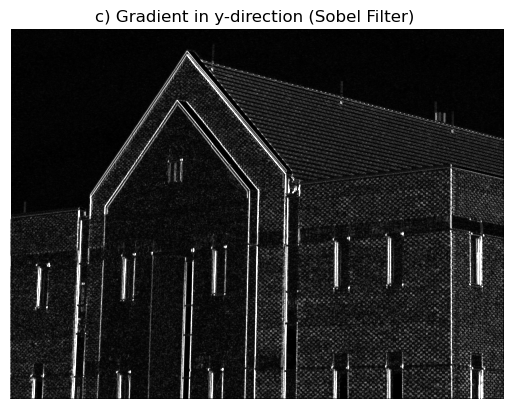

In [6]:
plt.figure(dpi=100)
plt.imshow(gradiendy, cmap='gray',vmax=255, vmin=0)
plt.axis('off')
plt.title('c) Gradient in y-direction (Sobel Filter) ')
plt.show()


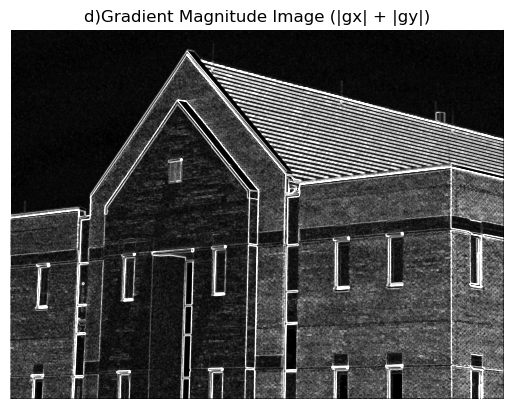

In [7]:
plt.figure(dpi=100)
plt.imshow(sobel_gradient_result, cmap='gray',vmax=255, vmin=0)
plt.axis('off')
plt.title('d)Gradient Magnitude Image (|gx| + |gy|)')
plt.show()


## Fig1018

In [10]:
def averagingfilter(imgval,width,height,maxval,filtersize):
    mask = np.ones([filtersize,filtersize], dtype = int)  #maske oluşturulur
    mask = mask/pow(filtersize,2)
    size = filtersize
    pnum = filtersize//2
    
    padding=np.pad(imgval,pnum,mode='constant')   #padding yapılır
    img_new=np.zeros([height,width])
    
    for i in range(0, height-1):
        for j in range(0, width-1):
            data = padding[i:i+size, j:j+size]  #average filter 
            datamean = np.mean(data)
            img_new[i,j] = datamean
    img_new= img_new.astype(np.uint8)
    return img_new


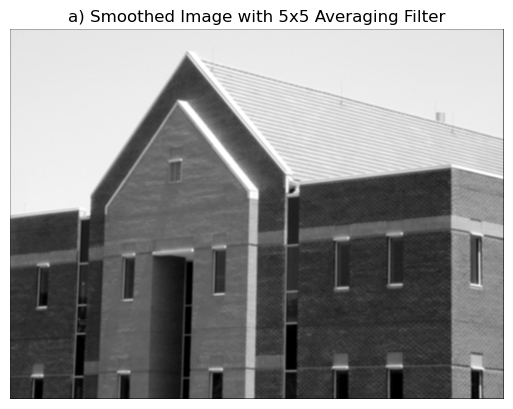

In [11]:
Fig1018, width, height, maxval = mypgmread('Fig1016.pgm')
filter5x5 = averagingfilter(Fig1018, width, height, maxval,5)
plt.figure(dpi=100)
plt.imshow(filter5x5, cmap='gray')
plt.title('a) Smoothed Image with 5x5 Averaging Filter')
plt.axis('off')  # Eksenleri kapatıldı
plt.show()

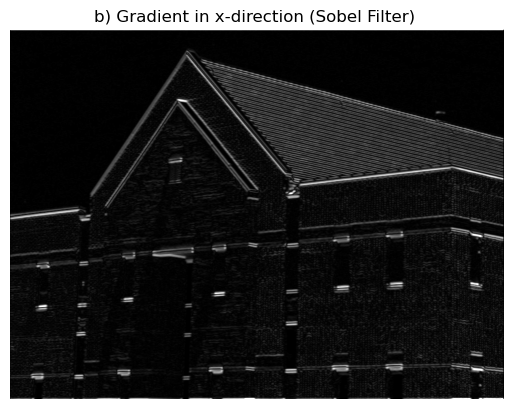

In [12]:
gradiendx5, gradiendy5, sobel_gradient_result5 = sobel_gradient(filter5x5, width, height)
plt.figure(dpi=100)
plt.imshow(gradiendx5, cmap='gray',vmax=255, vmin=0)
plt.axis('off')
plt.title('b) Gradient in x-direction (Sobel Filter) ')
plt.show()

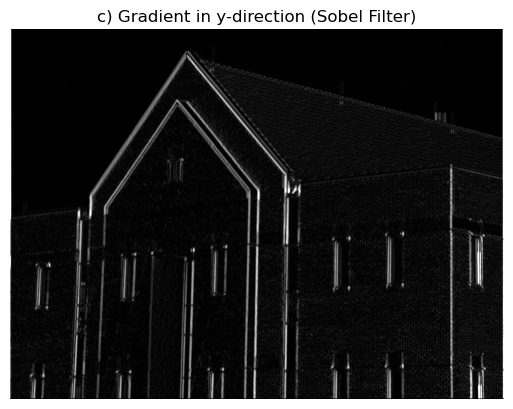

In [13]:
plt.figure(dpi=100)
plt.imshow(gradiendy5, cmap='gray',vmax=255, vmin=0)
plt.axis('off')
plt.title('c) Gradient in y-direction (Sobel Filter)')
plt.show()

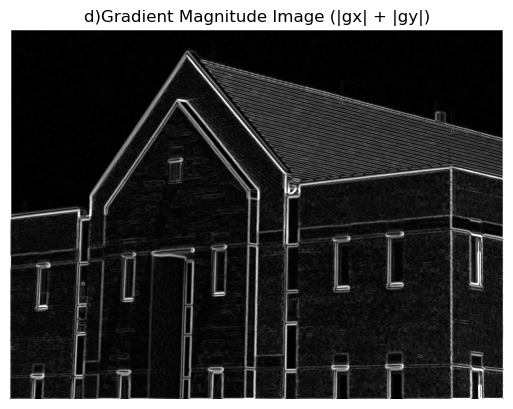

In [14]:
plt.figure(dpi=100)
plt.imshow(sobel_gradient_result5, cmap='gray',vmax=255, vmin=0)
plt.axis('off')
plt.title('d)Gradient Magnitude Image (|gx| + |gy|)')
plt.show()

 Figure 10.16 ve 10.18 karşılaştırıldığında 10.18'in daha düzgün sonuç verdiği görülür. Bunun sebebi görüntünün bulanıklaştırılmasıyla beraber kenar olmayan gürültülerin azaltılmış olmasıdır. Örneğin evin yüzeyindeki çizgiler 10.16-b,c,d görüntülerinde çok belli olmasına rağmen 10.18-b,c,d görüntülerinde bu yüzeyler belli değildir, resimde kenarlara odaklanılmıştır.

## Fig1038

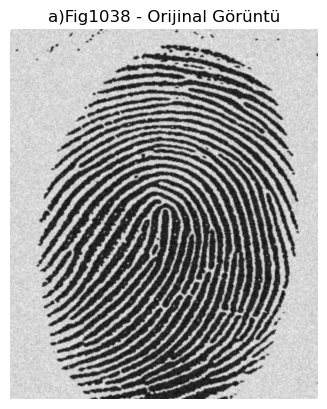

In [15]:
Fig1038, width, height, maxval = mypgmread('Fig1038.pgm')
plt.figure(dpi=100)
plt.imshow(Fig1038, cmap='gray')
plt.title('a)Fig1038 - Orijinal Görüntü')
plt.axis('off')
plt.show()

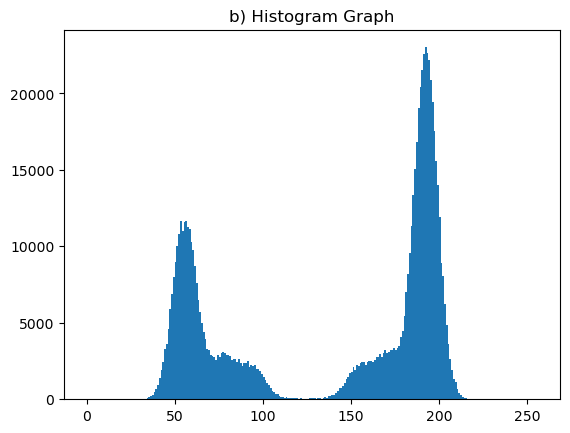

In [16]:
def histogramgraph(imgval, title):
    img = imgval.ravel()
    
    # Histogramı çizin
    plt.hist(img, 256, [0, 256])
    plt.title('b) Histogram Graph')

# İlk görüntü
Fig1038, _, _, _ = mypgmread('Fig1038.pgm')
histogramgraph(Fig1038, ' Fig1038 - Light')


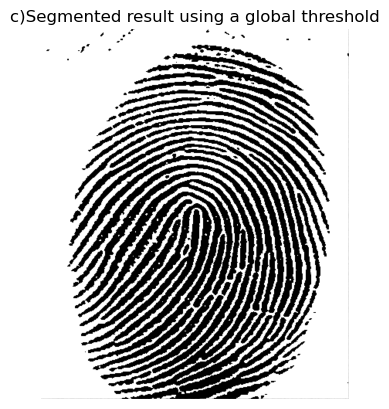

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def basicthreshold(imgval, T):
    imgval = np.array(imgval)
    height, width = imgval.shape  # Assuming imgval is a NumPy array
    for i in range(0, height-1):
        for j in range(0, width-1):
            if imgval[i][j] <= T:
                imgval[i][j] = 0
            elif imgval[i][j] > T:
                imgval[i][j] = 255
    return imgval

Fig1038, _, _, _ = mypgmread('Fig1038.pgm')
result = basicthreshold(Fig1038, 125)

plt.figure(dpi=100)
plt.imshow(result, cmap='gray')
plt.title('c)Segmented result using a global threshold')
plt.axis('off')
plt.show()


b şıkkında histogram graği verilen a şıkkındaki orjinal grafiğin eşik değerinin yaklaşık olarak 125 olduğu görünmüştür. Buna göre eşik değeri 125 olarak ayarlanarak basic threshold yapılarak c şıkkındaki görüntü elde edilmiştir.

## Fig1050

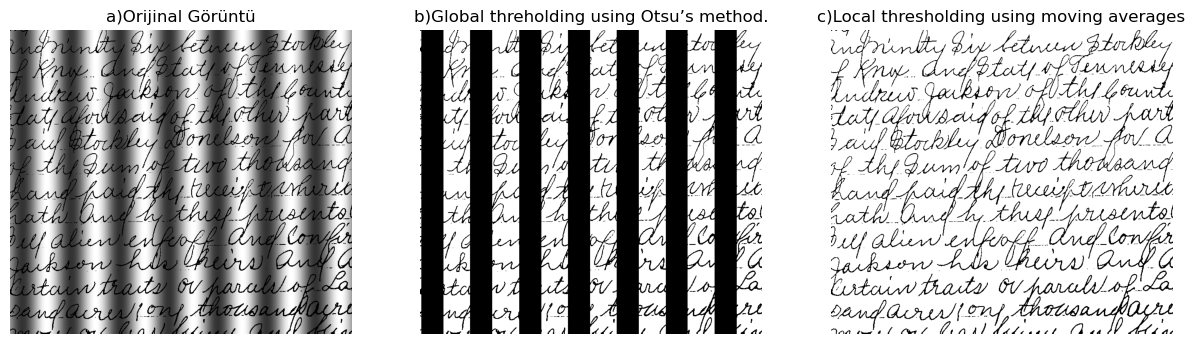

In [18]:
import matplotlib.pyplot as plt
import numpy as np


def otsu(goruntu):
    histogram, _ = np.histogram(goruntu.flatten(), 256, [0, 256])
    histogram_norm = histogram / np.sum(histogram)
    
    varyans = []
    for t in range(256):
        q1 = np.sum(histogram_norm[:t])
        q2 = np.sum(histogram_norm[t:])
        m1 = np.sum(np.arange(t) * histogram_norm[:t]) / (q1 if q1 != 0 else 1)
        m2 = np.sum(np.arange(t, 256) * histogram_norm[t:]) / (q2 if q2 != 0 else 1)
        varyans.append(q1 * q2 * (m1 - m2)**2)
    
    optdeger = np.argmax(varyans)
    
    return optdeger


def thsmoving_averages(imgval, size, b):
    newimg = np.zeros_like(imgval)

    for i in range(0, imgval.shape[0], size):
        for j in range(0, imgval.shape[1], size):
            mask = imgval[i:i+size, j:j+size]
            ortalama = np.mean(mask)
            esik = b * ortalama
            newsize = np.where(mask > esik, 255, 0)
            newimg[i:i+size, j:j+size] = newsize

    return newimg


Fig1050, genislik, yukseklik, max_deger = mypgmread('Fig1050.pgm')
Fig1050, width, height, maxval = mypgmread('Fig1050.pgm')

otsu_esik = otsu(Fig1050)

otsu_newimg = Fig1050 > otsu_esik


nsize = 20  
b = 0.5


localths = thsmoving_averages(Fig1050, nsize, b)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(Fig1050, cmap='gray')
plt.title('a)Orijinal Görüntü')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(otsu_newimg, cmap='gray')
plt.title('b)Global threholding using Otsu’s method.')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(localths, cmap='gray')
plt.title('c)Local thresholding using moving averages')
plt.axis('off')

plt.show()


 (b) görüntüsünde çizgilerin hala kaldığını görürüz ancak (c) görüntüsü, basit bir yöntem olan moving averages kullanılarak elde edilmiş ve metni daha iyi ortaya çıkarmıştır.